In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import time
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import ExpSineSquared

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

from sklearn.model_selection import GridSearchCV

class ModelWrapper:
    """
    Wrapper to simplify the process of
    loading data, parameter tuning, etc
    """
    def __init__(self, csv_name, *args, debug=False, **kwargs):
        df = pd.read_csv(csv_name)
        
        self.X = self.preprocess_X(df.iloc[:, :-1])
        
        # when debugging only use a tiny subset of the data
        if debug:
            self.X = self.X[:10]

        self.Y = df.iloc[:,-1]
        
    def preprocess_X(self, X):
        return X

    def predict(self, X):
        """
        Return a list of predictions
        and error associated with the model
        """
        raise NotImplemented
    
    def train(self, X, Y):
        """
        Train on a subset of the data, returning
        a model
        """
        raise NotImplemented

    def build_model(self):
        """
        Builds a model
        """
        X_train, X_test, Y_train, Y_test = train_test_split(self.X, self.Y)
        self.train(X_train, Y_train)
        Y_pred = self.predict(X_test)
        print (mean_squared_error(Y_pred, Y_test), "ERROR")


class SKLearnModelWrapper(ModelWrapper):
    """
    Specifically built for SKLearn models
    """
    def get_model(self):
        """
        Return the SKLearn model class
        """
        raise NotImplemented

    def train(self, X, Y):
        self.model = self.get_model()
        assert (self.model is not None)
        self.model.fit(X, Y)

    def predict(self, X):
        return self.model.predict(X)


class CombinedModelWrapper(ModelWrapper):
    """
    Combines the predictions for several models
    MAKE SURE THAT THE DATAFRAMES ARE ORDERED
    THE SAME WAY!!
    """
    def __init__(self, models, *args, **kwargs):
        self.models = models
        self.X = list(zip(model.X for model in models))
        self.Y = models[0].Y[:len(self.X)]
        
    def apply_models(self, X):
        return [
            [
                model.predict(x)
                for model, x in zip(self.models, dataset)
            ]
            for dataset in X
        ]

    def train(self, X, Y):
        X_transformed = self.apply_models(X)
        return super(CombinedModelWrapper, self).train(X_transformed, Y)

    def predict(self, X):
        X_transformed = self.apply_models(X)
        return super(CombinedModelWrapper, self).predict(X_transformed)

    def build_model(self):
        for model in self.models:
            model.build_model()

        return super(CombinedModelWrapper, self).build_model()

In [15]:
# read in data
df_all = pd.read_csv("data/coulomb_features.csv")
df_all = df_all.drop(df_all.columns[[0]], axis=1) 

In [30]:
from model_wrapper import (
    SKLearnModelWrapper,
    ModelWrapper
)

In [147]:
from sklearn import linear_model

class KernelRidgeRegression(SKLearnModelWrapper):
    def get_model(self):
        return KernelRidge(kernel='laplacian', alpha=.01,gamma=.0001)
        '''return GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-4, 2, 7)})'''

In [ ]:
linear_adjacency_eigenvalues = KernelRidgeRegression("data/coulomb_features_all.csv")
t0 = time.time()
linear_adjacency_eigenvalues.build_model()
print(time.time()-t0)

ASDASD


In [3]:
np.logspace(50, 200, 10)

array([  1.00000000e+050,   4.64158883e+066,   2.15443469e+083,
         1.00000000e+100,   4.64158883e+116,   2.15443469e+133,
         1.00000000e+150,   4.64158883e+166,   2.15443469e+183,
         1.00000000e+200])

In [21]:
vals = df_all.values
train_num = 150
X_train = vals[:train_num, :-1]
X_test = vals[train_num:, :-1]
Y_train = vals[:train_num, -1]
Y_test = vals[train_num:, -1]

In [27]:
pred = KernelRidge(alpha = 1.0, kernel = "rbf", gamma=1.0)
pred.fit(X_train, Y_train)


-4.6288668355568019

In [ ]:
# Fit KernelRidge with parameter selection based on 5-fold cross validation
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}
kr = GridSearchCV(KernelRidge(), cv=5, param_grid=param_grid)
stime = time.time()
kr.fit(X, y)
print("Time for KRR fitting: %.3f" % (time.time() - stime))

# Predict using kernel ridge
X_plot = np.linspace(0, 20, 10000)[:, None]
stime = time.time()
y_kr = kr.predict(X_plot)
print("Time for KRR prediction: %.3f" % (time.time() - stime))

In [2]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.98


In [5]:
df_test.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#store gap values
Y_train = df_train.gap.values
#row where testing examples start
test_idx = df_train.shape[0]
#delete 'Id' column
df_test = df_test.drop(['Id'], axis=1)
#delete 'gap' column
df_train = df_train.drop(['gap'], axis=1)

In [7]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)
df_all.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
"""
Example Feature Engineering

this calculates the length of each smile string and adds a feature column with those lengths
Note: this is NOT a good feature and will result in a lower score!
"""
#smiles_len = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
#df_all['smiles_len'] = pd.DataFrame(smiles_len)


'\nExample Feature Engineering\n\nthis calculates the length of each smile string and adds a feature column with those lengths\nNote: this is NOT a good feature and will result in a lower score!\n'

In [10]:
#Drop the 'smiles' column
df_all = df_all.drop(['smiles'], axis=1)
vals = df_all.values
X_train = vals[:test_idx]
X_test = vals[test_idx:]
print("Train features:", X_train.shape)
print("Train gap:", Y_train.shape)
print("Test features:", X_test.shape)

Train features: (1000000, 256)
Train gap: (1000000,)
Test features: (824230, 256)


In [11]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)

In [12]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)

In [13]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [14]:
write_to_file("sample1.csv", LR_pred)
write_to_file("sample2.csv", RF_pred)

In [15]:
import rdkit

ModuleNotFoundError: No module named 'rdkit'

SVR complexity and bandwidth selected and model fitted in 0.548 s
KRR complexity and bandwidth selected and model fitted in 0.190 s
Support vector ratio: 0.310
SVR prediction for 100000 inputs in 0.061 s
KRR prediction for 100000 inputs in 0.173 s


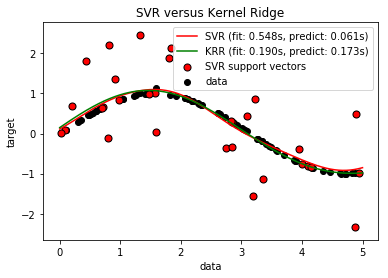

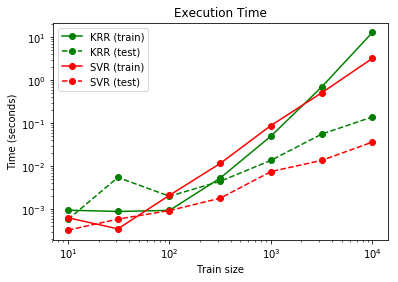

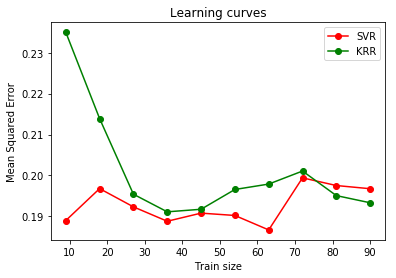

In [39]:
"""
=============================================
Comparison of kernel ridge regression and SVR
=============================================

Both kernel ridge regression (KRR) and SVR learn a non-linear function by
employing the kernel trick, i.e., they learn a linear function in the space
induced by the respective kernel which corresponds to a non-linear function in
the original space. They differ in the loss functions (ridge versus
epsilon-insensitive loss). In contrast to SVR, fitting a KRR can be done in
closed-form and is typically faster for medium-sized datasets. On the other
hand, the learned model is non-sparse and thus slower than SVR at
prediction-time.

This example illustrates both methods on an artificial dataset, which
consists of a sinusoidal target function and strong noise added to every fifth
datapoint. The first figure compares the learned model of KRR and SVR when both
complexity/regularization and bandwidth of the RBF kernel are optimized using
grid-search. The learned functions are very similar; however, fitting KRR is
approx. seven times faster than fitting SVR (both with grid-search). However,
prediction of 100000 target values is more than tree times faster with SVR
since it has learned a sparse model using only approx. 1/3 of the 100 training
datapoints as support vectors.

The next figure compares the time for fitting and prediction of KRR and SVR for
different sizes of the training set. Fitting KRR is faster than SVR for medium-
sized training sets (less than 1000 samples); however, for larger training sets
SVR scales better. With regard to prediction time, SVR is faster than
KRR for all sizes of the training set because of the learned sparse
solution. Note that the degree of sparsity and thus the prediction time depends
on the parameters epsilon and C of the SVR.
"""

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause


from __future__ import division
import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))


# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()